In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gvar as gv
import lsqfit

In [2]:

import matplotlib as mpl
from  matplotlib import rc
import matplotlib.pyplot as plt


colorsrgb = [(0, 0, 0), (230, 159, 0), (86, 180, 233),
          (0, 158, 115), (240, 228, 66), (0, 114, 178),
          (213, 94, 0), (204, 121, 167)]

fmts = ['o', 'd', 's', '^', '<', '8', '6', 'd', 'x']
colors = [tuple([el / 255 for el in c]) for c in colorsrgb]

mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "Times New Roman"
mpl.rcParams.keys()
# mpl.rcParams["text.fontset"] = "Times New Roman"
mpl.rcParams["mathtext.fontset"] = "stix"

In [3]:
data_points = {}
trims = {(1, 2): 20, (2, 2): 20, (2, 4): 15, (1, 4): 10}
for m in [1, 2]:
    for ns in [2, 4]:
        directory = f'ProcessedData/ProcessedData/m={m}ns={ns}/'
        str1 = 'finalreadoutdynamicdecoupling_nairobi.csv'
        str2 = 'finalreadoutrescaling_nairobi.csv'
        file1 = np.loadtxt(directory + str1)
        file2 = np.loadtxt(directory + str2)
        d1 = gv.gvar(file1[0], file1[1:])[:trims[(m, ns)]]
        d2 = gv.gvar(file2[0], file2[1:])[:trims[(m, ns)]]
        data_points[(m, ns)] = [d1, d2]
        print(len(d1))

20
10
20
15


# 1. Let's first look at the best fits for the rescaling circuits
we fit the circuits to the functional form

\begin{equation}
f(x) = A cos(Bx) * exp(-C x) + D
\end{equation}

In [4]:
def fcn(x, p):
    return p[0] * gv.cos(p[1] * x) * gv.exp(p[2] * x) + p[3]

def get_fit(key, p0=[0, 0, 0, 0]):
    ypts = data_points[key][1]
    xpts = np.linspace(1, len(ypts), len(ypts))
    data = (xpts, ypts)
    fit_result = lsqfit.nonlinear_fit(data=data, fcn=fcn, p0=p0)
    print(fit_result)
    return fit_result, data

def get_fit_corr(key, data, p0=[0, 0, 0, 0]):
    ypts = data
    xpts = np.linspace(1, len(ypts), len(ypts))
    data = (xpts, ypts)
    fit_result = lsqfit.nonlinear_fit(data=data, fcn=fcn, p0=p0)
    print(fit_result)
    return fit_result, data

all_fits = {}

Here we fit the $a_s m = 1$ and $N_s = 2$ data

In [5]:
key = (1, 2)
fit_result, data = get_fit(key)
all_fits[key] = fit_result

Least Square Fit (no prior):
  chi2/dof [dof] = 3.5 [16]    Q = 3.2e-06    

Parameters:
              0   -2704 (270907)       [   0 +- inf ]  
              1      -0.001 (67)       [   0 +- inf ]  
              2    0.00003 (334)       [   0 +- inf ]  
              3    2705 (270907)       [   0 +- inf ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10)    (itns/time = 1000*/0.3)
  fitter = scipy_least_squares    method = trf



20 200


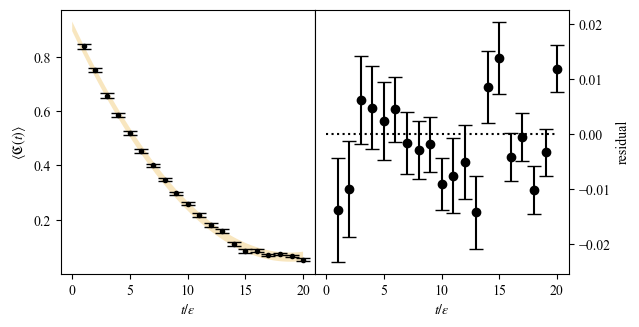

In [6]:
fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True)
ax[0].errorbar(data[0], gv.mean(data[1]), yerr=gv.sdev(data[1]),
             capsize=5, color=colors[0], fmt='.')
xpoints = np.linspace(0, 20, 200)
ypoints = fcn(xpoints, fit_result.p)
ym, dy = gv.mean(ypoints), gv.sdev(ypoints)
ax[0].fill_between(xpoints, ym + dy, ym - dy, facecolor=list(colors[1]) + [0.25])
print(len(data[1]), len(xpoints))
xpts = np.linspace(1, len(data[1]), len(data[1]))
ax[1].errorbar(xpts, gv.mean(fcn(data[0], fit_result.p) - data[1]), yerr=gv.sdev(data[1]),
               capsize=5, color=colors[0], fmt='o')
ax[1].plot([0, 20], [0, 0], 'k:')
ax[1].yaxis.tick_right()
fig.set_size_inches((6.5, 3.375))
ax[0].set_xlabel(r'$t/\epsilon$')
ax[1].set_xlabel(r'$t/\epsilon$')
ax[0].set_ylabel(r'$\langle \mathfrak{C}(t)\rangle$')
ax[1].yaxis.set_label_position("right")
ax[1].set_ylabel(r'residual')
fig.tight_layout()
fig.subplots_adjust(wspace=0)
fig.savefig('residualcomprescalingm1ns2.pdf')

Here we fit the $m = 2$ and $N_s = 2$

In [7]:
key = (2, 2)
fit_result, data = get_fit(key)
all_fits[key] = fit_result

Least Square Fit (no prior):
  chi2/dof [dof] = 16 [16]    Q = 6.1e-46    

Parameters:
              0     0.638 (16)      [   0 +- inf ]  
              1   -0.1359 (24)      [   0 +- inf ]  
              2   -0.0355 (16)      [   0 +- inf ]  
              3     0.215 (11)      [   0 +- inf ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 32/0.0)
  fitter = scipy_least_squares    method = trf



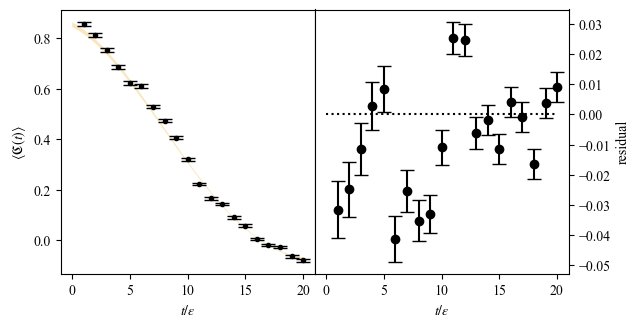

In [8]:
fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True)
ax[0].errorbar(data[0], gv.mean(data[1]), yerr=gv.sdev(data[1]),
             capsize=5, color=colors[0], fmt='.')
xpoints = np.linspace(0, 20, 200)
ypoints = fcn(xpoints, fit_result.p)
ym, dy = gv.mean(ypoints), gv.sdev(ypoints)
ax[0].fill_between(xpoints, ym + dy, ym - dy, facecolor=list(colors[1]) + [0.25])
ax[1].errorbar(xpts, gv.mean(fcn(data[0], fit_result.p) - data[1]), yerr=gv.sdev(data[1]),
               capsize=5, color=colors[0], fmt='o')
ax[1].plot([0, 20], [0, 0], 'k:')
ax[1].yaxis.tick_right()
fig.set_size_inches((6.5, 3.375))
ax[0].set_xlabel(r'$t/\epsilon$')
ax[1].set_xlabel(r'$t/\epsilon$')
ax[0].set_ylabel(r'$\langle \mathfrak{C}(t)\rangle$')
ax[1].yaxis.set_label_position("right")
ax[1].set_ylabel(r'residual')
fig.tight_layout()
fig.subplots_adjust(wspace=0)
fig.savefig('residualcomprescalingm2ns2.pdf')

Here we fit the $a_s m = 1$ and $N_s = 4$ data

In [9]:
key = (1, 4)
fit_result, data = get_fit(key, p0=[1, 0, 0, 0])
all_fits[key] = fit_result

Least Square Fit (no prior):
  chi2/dof [dof] = 23 [6]    Q = 4.4e-27    

Parameters:
              0     0.635 (18)      [   1 +- inf ]  
              1    0.3010 (66)      [   0 +- inf ]  
              2   -0.1701 (76)      [   0 +- inf ]  
              3    0.1020 (88)      [   0 +- inf ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 17/0.0)
  fitter = scipy_least_squares    method = trf



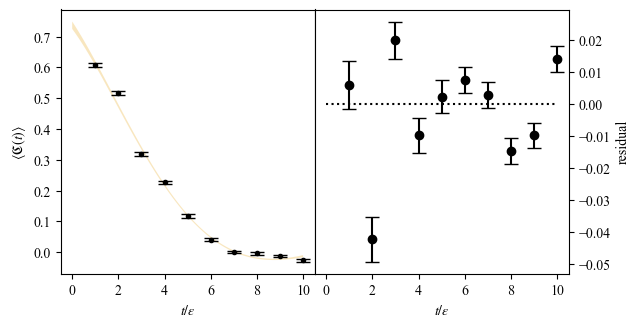

In [10]:
fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True)
ax[0].errorbar(data[0], gv.mean(data[1]), yerr=gv.sdev(data[1]),
             capsize=5, color=colors[0], fmt='.')
xpoints = np.linspace(0, 10, 200)
ypoints = fcn(xpoints, fit_result.p)
ym, dy = gv.mean(ypoints), gv.sdev(ypoints)
ax[0].fill_between(xpoints, ym + dy, ym - dy, facecolor=list(colors[1]) + [0.25])
ax[1].errorbar(data[0], gv.mean(fcn(data[0], fit_result.p) - data[1]), yerr=gv.sdev(data[1]),
               capsize=5, color=colors[0], fmt='o')
ax[1].plot([0, 10], [0, 0], 'k:')
ax[1].yaxis.tick_right()
fig.set_size_inches((6.5, 3.375))
ax[0].set_xlabel(r'$t/\epsilon$')
ax[1].set_xlabel(r'$t/\epsilon$')
ax[0].set_ylabel(r'$\langle \mathfrak{C}(t)\rangle$')
ax[1].yaxis.set_label_position("right")
ax[1].set_ylabel(r'residual')
fig.tight_layout()
fig.subplots_adjust(wspace=0)
fig.savefig('residualcomprescalingm1ns4.pdf')

Here we fit the $m = 2$ and $N_s = 4$

In [11]:
key = (2, 4)
fit_result, data = get_fit(key)
all_fits[key] = fit_result

Least Square Fit (no prior):
  chi2/dof [dof] = 2.2 [11]    Q = 0.012    

Parameters:
              0     0.919 (16)      [   0 +- inf ]  
              1    0.1749 (76)      [   0 +- inf ]  
              2   -0.2649 (68)      [   0 +- inf ]  
              3    0.0353 (47)      [   0 +- inf ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 28/0.0)
  fitter = scipy_least_squares    method = trf



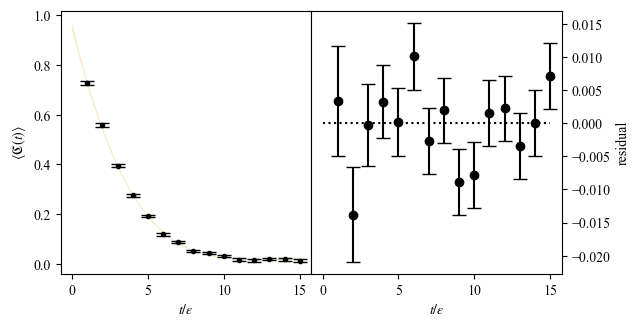

In [12]:
fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True)
ax[0].errorbar(data[0], gv.mean(data[1]), yerr=gv.sdev(data[1]),
             capsize=5, color=colors[0], fmt='.')
xpoints = np.linspace(0, 15, 200)
ypoints = fcn(xpoints, fit_result.p)
ym, dy = gv.mean(ypoints), gv.sdev(ypoints)
ax[0].fill_between(xpoints, ym + dy, ym - dy, facecolor=list(colors[1]) + [0.25])
ax[1].errorbar(data[0], gv.mean(fcn(data[0], fit_result.p) - data[1]), yerr=gv.sdev(data[1]),
               capsize=5, color=colors[0], fmt='o')
ax[1].plot([0, 15], [0, 0], 'k:')
ax[1].yaxis.tick_right()
fig.set_size_inches((6.5, 3.375))
ax[0].set_xlabel(r'$t/\epsilon$')
ax[1].set_xlabel(r'$t/\epsilon$')
ax[0].set_ylabel(r'$\langle \mathfrak{C}(t)\rangle$')
ax[1].yaxis.set_label_position("right")
ax[1].set_ylabel(r'residual')
fig.tight_layout()
fig.subplots_adjust(wspace=0)
fig.savefig('residualcomprescalingm2ns4.pdf')

# 2. Now lets look at what the comparison of the fit results looks like 

we first try a fit of the data to the ansatz:

\begin{equation}
\mathfrak{C}(t / \epsilon) = A cos( B t / \epsilon) * exp(-C t / \epsilon) + D
\end{equation}

We compare three methods of fitting:
1. Fit the unrescaled correlator to the functional form
2. Fit the rescaled correlator to the functional form
3. Rescale the unrescaled correlator by the correlator fit evaluated at $t / \epsilon$

Least Square Fit (no prior):
  chi2/dof [dof] = 24 [5]    Q = 1e-24    

Parameters:
              0     0.840 (10)      [    1 +- inf ]  
              1   1.61960 (66)      [ 1.84 +- inf ]  
              2   -0.0466 (14)      [    0 +- inf ]  
              3    0.0012 (16)      [    0 +- inf ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 10/0.0)
  fitter = scipy_least_squares    method = trf

Least Square Fit (no prior):
  chi2/dof [dof] = 25 [5]    Q = 9.1e-26    

Parameters:
              0     0.852 (15)      [    1 +- inf ]  
              1   1.62128 (77)      [ 1.84 +- inf ]  
              2    0.0398 (21)      [    0 +- inf ]  
              3    0.0056 (28)      [    0 +- inf ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 11/0.0)
  fitter = scipy_least_squares    method = trf

Least Square Fit (no prior):
  chi2/dof [dof] = 52 [5]    Q = 3.6e-54    

Parameters:
              0     0.817 (14)      [    

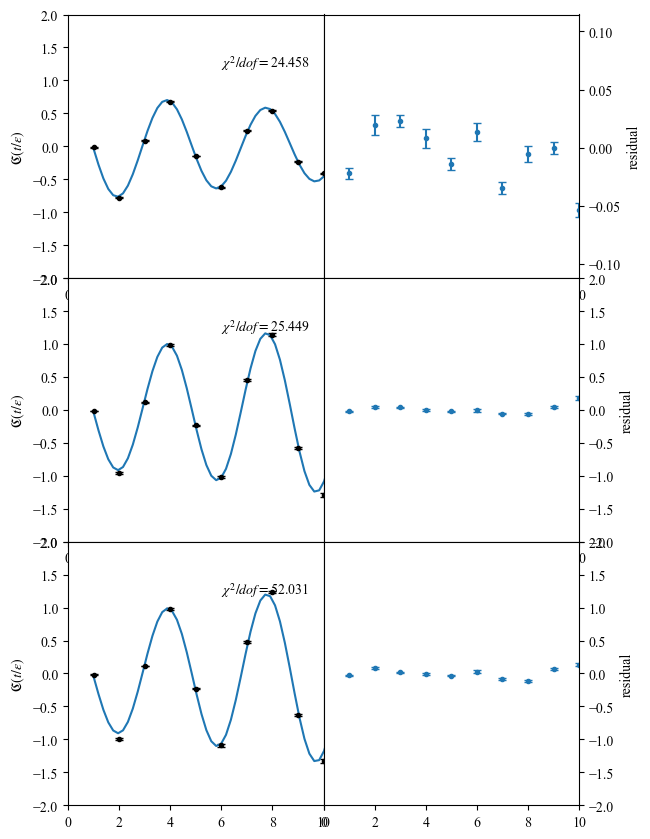

In [13]:
key = (2, 2)
data1 = data_points[key][0]
data2 = data_points[key][0] / data_points[key][1]
data3 = data_points[key][0] / fcn(np.linspace(1, trims[key], trims[key]),
                                  all_fits[key].p)

inflate_sig1 = {(2, 4): 1.2e2, (1, 4): 15 * 1.021, (1, 2): 98, (2, 2): 46}
inflate_sig2 = {(2, 4): 4.6, (1, 4): 13 * 0.96 * 1.004, (1, 2): 19, (2, 2):69}
inflate_sig3 = {(2, 4): 6, (1, 4): 45.344, (1, 2): 39, (2, 2): 92}


inflate_sig1 = {(2, 4): 1, (1, 4): 1, (1, 2): 1, (2, 2): 1}
inflate_sig2 = {(2, 4): 1, (1, 4): 1, (1, 2): 1, (2, 2):1}
inflate_sig3 = {(2, 4): 1, (1, 4): 1, (1, 2): 1, (2, 2): 1}

data1 = gv.gvar(gv.mean(data_points[key][0]), gv.evalcov(data_points[key][0]) * inflate_sig1[key])
data2 = gv.gvar(gv.mean(data_points[key][0] / data_points[key][1]),
                gv.evalcov(data_points[key][0] / data_points[key][1]) * inflate_sig2[key])
data3 = gv.gvar(gv.mean(data_points[key][0] / fcn(np.linspace(1, trims[key], trims[key]),
                                  all_fits[key].p)),
                gv.evalcov(data_points[key][0] / fcn(np.linspace(1, trims[key], trims[key]),
                                  all_fits[key].p)) * inflate_sig3[key])
# data3 = np.array([1, 1, 1, 1, 1, 1, -1, 1, 1, 1]) * data3
fit1, _ = get_fit_corr(key, data1[:9], p0=[1, 1.84, 0, 0])
fit2, _ = get_fit_corr(key, data2[:9], p0=[1, 1.84, 0, 0])
fit3, _ = get_fit_corr(key, data3[:9], p0=[1, 1.84, 0, 0])


fig, ax = plt.subplots(ncols=2, nrows=3)
xpoints = np.linspace(1, len(data1), 100)
xpts = np.linspace(1, len(data1), len(data1))

ax[0, 0].errorbar(np.linspace(1, len(data1), len(data1)),
             gv.mean(data1), yerr=gv.sdev(data1), capsize=3, color=colors[0], fmt='.')

ax[0, 0].plot(xpoints, fcn(xpoints, gv.mean(fit1.p)))
ax[0, 1].errorbar(xpts, gv.mean(fcn(xpts, fit1.p) - data1), yerr=gv.sdev(data1),
                  capsize=3, fmt='.')


ax[1, 0].errorbar(np.linspace(1, len(data1), len(data1)),
             gv.mean(data2), yerr=gv.sdev(data2), capsize=3, color=colors[0], fmt='.')

ax[1, 0].plot(xpoints, fcn(xpoints, gv.mean(fit2.p)))
ax[1, 1].errorbar(xpts, gv.mean(fcn(xpts, fit2.p) - data2), yerr=gv.sdev(data2),
                  capsize=3, fmt='.')


ax[2, 0].errorbar(np.linspace(1, len(data1), len(data1)),
             gv.mean(data3), yerr=gv.sdev(data3), capsize=3, color=colors[0], fmt='.')

ax[2, 0].plot(xpoints, fcn(xpoints, gv.mean(fit3.p)))
ax[2, 1].errorbar(xpts, gv.mean(fcn(xpts, fit3.p) - data3), yerr=gv.sdev(data3),
                  capsize=3, fmt='.')

for i in range(3):
    ax[i, 1].yaxis.tick_right()
    ax[i, 1].yaxis.set_label_position("right")
    ax[i, 1].set_ylabel('residual')
    ax[i, 0].set_ylabel(r'$\mathfrak{C}(t / \epsilon)$')
    ax[i, 0].set_ylim(-2, 2)
    ax[i, 0].set_xlim(0, 10)
    ax[i, 1].set_xlim(0, 10)
ax[0, 0].annotate(r'$\chi^2 / dof = $' + str(np.round(fit1.chi2 / fit1.dof, decimals=3)),
                 (0.6, 0.8), xycoords='axes fraction')
ax[1, 0].annotate(r'$\chi^2 / dof = $' + str(np.round(fit2.chi2 / fit2.dof, decimals=3)),
                 (0.6, 0.8), xycoords='axes fraction')
ax[2, 0].annotate(r'$\chi^2 / dof = $' + str(np.round(fit3.chi2 / fit3.dof, decimals=3)),
                 (0.6, 0.8), xycoords='axes fraction')
ax[1, 1].set_ylim(-2, 2)
ax[2, 1].set_ylim(-2, 2)
# ax[0, 0].plot(xpoints, fcn(xpoints, gv.mean(fit2.p)))
# ax[0, 0].plot(xpoints, fcn(xpoints, gv.mean(fit3.p)))

fig.set_size_inches((6.5, 8.5))
fig.tight_layout()
fig.subplots_adjust(hspace=0, wspace=0)
fig.savefig(f'test_fit_proceedurem{key[0]}ns{key[1]}.pdf')

# 2 two parameter versus 

let's first look at the fourier spectrum to assess how many modes we should add into our fit for each set of parameters

In [14]:
def dft(points, num_mom):
    ret = []
    moms = np.linspace(0, num_mom - 1, num_mom) * 2 * np.pi / num_mom
    for i in range(0,num_mom):
        tmpre = 0.
        tmpim = 0.
        for j in range(0,len(points)):
            tmpre += points[j]*gv.cos(moms[i] * j)
            tmpim += points[j]*gv.sin(moms[i] * j)
        ret.append(tmpre ** 2 + tmpim ** 2)
        
    return ret

def get_fit_corr(key, data, p0=[0, 0, 0, 0]):
    ypts = data
    xpts = np.linspace(1, len(ypts), len(ypts))
    data = (xpts, ypts)
    fit_result = lsqfit.nonlinear_fit(data=data, fcn=fcn, p0=p0)
    return fit_result, data

def fcn2p(x, p):
    ret = p[0] * gv.cos(p[1] * x) + (1 - p[0]) * gv.cos(p[2] * x)
    ret *= gv.exp(p[3] * x) + p[4]
    return ret

def get_fit_corr2(key, data, p0=[0, 0, 0, 0, 0, 0]):
    ypts = data
    xpts = np.linspace(1, len(ypts), len(ypts))
    data = (xpts, ypts)
    fit_result = lsqfit.nonlinear_fit(data=data, fcn=fcn2p, p0=p0,
                                      bounds=[(-1, -np.inf,  -np.inf, -np.inf, -1),
                                              (1, np.inf, np.inf, np.inf, 1)])
#     print(fit_result)
    return fit_result, data

## $m = 1$, $N_s = 2$

Text(0, 0.5, '$F(\\omega)^2$')

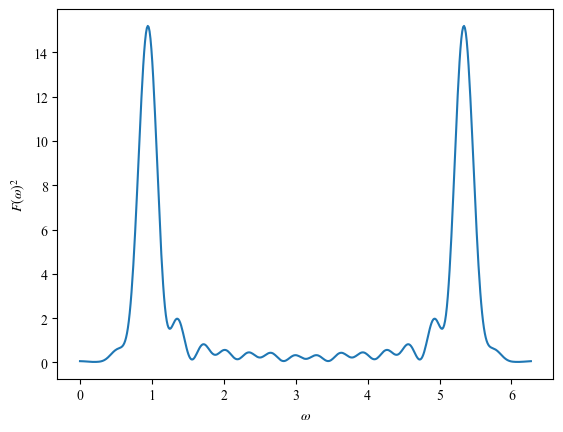

In [15]:
key = (1, 2)
steps = 500
plt.plot(np.linspace(0, steps - 1, steps) * 2 * np.pi / steps, gv.mean(dft(data_points[key][0], steps)))
plt.xlabel(r'$\omega$')
plt.ylabel(r'$F(\omega)^2$')

this looks like one peak strongly around $\omega = 1$ and then another peak around $\omega = 1.25$

Least Square Fit (no prior):
  chi2/dof [dof] = 25 [15]    Q = 9.8e-70    

Parameters:
              0    0.8849 (28)      [    0.8 +- inf ]  
              1   0.90978 (68)      [    0.9 +- inf ]  
              2    0.1099 (50)      [    0.4 +- inf ]  
              3    0.0326 (20)      [ 0.0349 +- inf ]  
              4    -0.080 (16)      [ 0.1016 +- inf ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 11/0.0)
  fitter = scipy_least_squares    method = trf



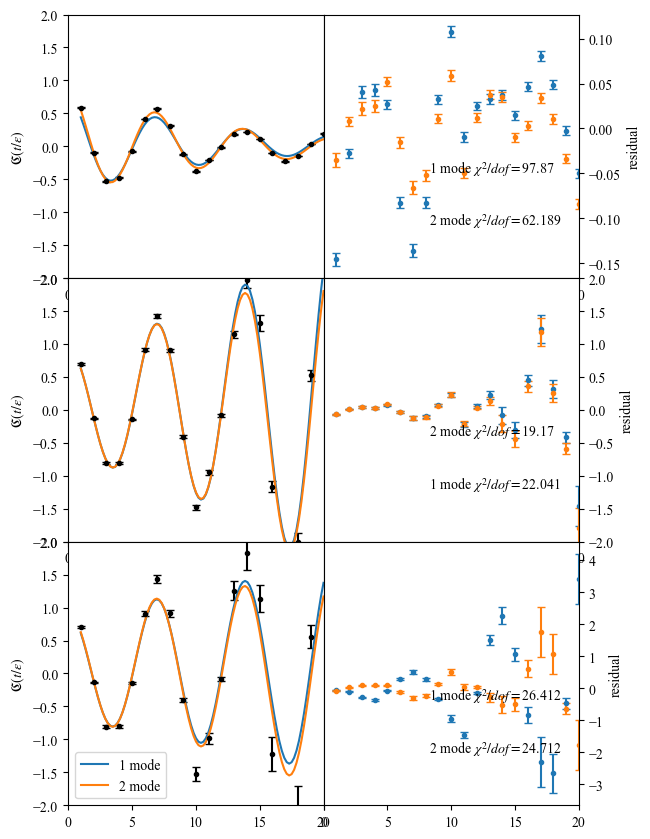

In [16]:


inflate_sig1 = {(2, 4): 1, (1, 4): 1, (1, 2): 1, (2, 2): 1}
inflate_sig2 = {(2, 4): 1, (1, 4): 1, (1, 2): 1, (2, 2):1}
inflate_sig3 = {(2, 4): 1, (1, 4): 1, (1, 2): 1, (2, 2): 1}

data1 = gv.gvar(gv.mean(data_points[key][0]), gv.evalcov(data_points[key][0]) * inflate_sig1[key])
data2 = gv.gvar(gv.mean(data_points[key][0] / data_points[key][1]),
                gv.evalcov(data_points[key][0] / data_points[key][1]) * inflate_sig2[key])
data3 = gv.gvar(gv.mean(data_points[key][0] / fcn(np.linspace(1, trims[key], trims[key]),
                                  all_fits[key].p)),
                gv.evalcov(data_points[key][0] / fcn(np.linspace(1, trims[key], trims[key]),
                                  all_fits[key].p)) * inflate_sig3[key])
# data3 = np.array([1, 1, 1, 1, 1, 1, -1, 1, 1, 1]) * data3
fit11, _ = get_fit_corr(key, data1, p0=[1, 0.84, 0, 0])
fit12, _ = get_fit_corr2(key, data1, p0=[1, 0.84,  1.25, 0, 0])
fit21, _ = get_fit_corr(key, data2, p0=[1, 0.84, 0, 0])
fit22, _ = get_fit_corr2(key, data2, p0=[1, 0.84,  1.25, 0, 0])
fit31, _ = get_fit_corr(key, data3, p0=[1, 0.84, 0, 0])
fit32, _ = get_fit_corr2(key, data3, p0=[0.8, 0.9, 0.4, 0.0349, 0.1016])
print(fit32)
fig, ax = plt.subplots(ncols=2, nrows=3)
xpoints = np.linspace(1, len(data1), 100)
xpts = np.linspace(1, len(data1), len(data1))

ax[0, 0].errorbar(np.linspace(1, len(data1), len(data1)),
             gv.mean(data1), yerr=gv.sdev(data1), capsize=3, color=colors[0], fmt='.')

ax[0, 0].plot(xpoints, fcn(xpoints, gv.mean(fit11.p)))
ax[0, 1].errorbar(xpts, gv.mean(fcn(xpts, fit11.p) - data1), yerr=gv.sdev(data1),
                  capsize=3, fmt='.')

ax[0, 0].plot(xpoints, fcn2p(xpoints, gv.mean(fit12.p)))
ax[0, 1].errorbar(xpts, gv.mean(fcn2p(xpts, fit12.p) - data1), yerr=gv.sdev(data1),
                  capsize=3, fmt='.')


ax[1, 0].errorbar(np.linspace(1, len(data1), len(data1)),
             gv.mean(data2), yerr=gv.sdev(data2), capsize=3, color=colors[0], fmt='.')

ax[1, 0].plot(xpoints, fcn(xpoints, gv.mean(fit21.p)))
ax[1, 1].errorbar(xpts, gv.mean(fcn(xpts, fit21.p) - data2), yerr=gv.sdev(data2),
                  capsize=3, fmt='.')

ax[1, 0].plot(xpoints, fcn2p(xpoints, gv.mean(fit22.p)))
ax[1, 1].errorbar(xpts, gv.mean(fcn2p(xpts, fit22.p) - data2), yerr=gv.sdev(data2),
                  capsize=3, fmt='.')


ax[2, 0].errorbar(np.linspace(1, len(data1), len(data1)),
             gv.mean(data3), yerr=gv.sdev(data3), capsize=3, color=colors[0], fmt='.')

ax[2, 0].plot(xpoints, fcn(xpoints, gv.mean(fit31.p)), label='1 mode')
ax[2, 1].errorbar(xpts, gv.mean(fcn(xpts, fit32.p) - data3), yerr=gv.sdev(data3),
                  capsize=3, fmt='.')

ax[2, 0].plot(xpoints, fcn2p(xpoints, gv.mean(fit32.p)), label='2 mode')
ax[2, 1].errorbar(xpts, gv.mean(fcn2p(xpts, fit32.p) - data3), yerr=gv.sdev(data3),
                  capsize=3, fmt='.')
ax[2, 0].legend()
for i in range(3):
    ax[i, 1].yaxis.tick_right()
    ax[i, 1].yaxis.set_label_position("right")
    ax[i, 1].set_ylabel('residual')
    ax[i, 0].set_ylabel(r'$\mathfrak{C}(t / \epsilon)$')
    ax[i, 0].set_ylim(-2, 2)
    ax[i, 0].set_xlim(0, 20)
    ax[i, 1].set_xlim(0, 20)
ax[0, 1].annotate(r' 1 mode $\chi^2 / dof = $' + str(np.round(fit11.chi2 / fit11.dof, decimals=3)),
                 (0.4, 0.4), xycoords='axes fraction')
ax[1, 1].annotate(r' 2 mode $\chi^2 / dof = $' + str(np.round(fit21.chi2 / fit21.dof, decimals=3)),
                 (0.4, 0.4), xycoords='axes fraction')
ax[2, 1].annotate(r' 1 mode $\chi^2 / dof = $' + str(np.round(fit31.chi2 / fit31.dof, decimals=3)),
                 (0.4, 0.4), xycoords='axes fraction')
ax[0, 1].annotate(r' 2 mode $\chi^2 / dof = $' + str(np.round(fit12.chi2 / fit12.dof, decimals=3)),
                 (0.4, 0.2), xycoords='axes fraction')
ax[1, 1].annotate(r' 1 mode $\chi^2 / dof = $' + str(np.round(fit22.chi2 / fit22.dof, decimals=3)),
                 (0.4, 0.2), xycoords='axes fraction')
ax[2, 1].annotate(r' 2 mode $\chi^2 / dof = $' + str(np.round(fit32.chi2 / fit32.dof, decimals=3)),
                 (0.4, 0.2), xycoords='axes fraction')
ax[1, 1].set_ylim(-2, 2)
# ax[2, 1].set_ylim(-2, 2)
# ax[0, 0].plot(xpoints, fcn(xpoints, gv.mean(fit2.p)))
# ax[0, 0].plot(xpoints, fcn(xpoints, gv.mean(fit3.p)))

fig.set_size_inches((6.5, 8.5))
fig.tight_layout()
fig.subplots_adjust(hspace=0, wspace=0)

fig.savefig(f'test_fit_proceedurecomp_m{key[0]}ns{key[1]}.pdf')

In [17]:
data2 = gv.gvar(gv.mean(data_points[key][0] / data_points[key][1]),
                gv.evalcov(data_points[key][0] / data_points[key][1]) * 19.71 * 0.97)

fit21, _ = get_fit_corr(key, data2[:20], p0=[1, 0.84, 0, 0])
print(fit21)

Least Square Fit (no prior):
  chi2/dof [dof] = 1 [16]    Q = 0.45    

Parameters:
              0    0.803 (60)     [    1 +- inf ]  
              1   0.9096 (28)     [ 0.84 +- inf ]  
              2   0.0581 (65)     [    0 +- inf ]  
              3    0.107 (15)     [    0 +- inf ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 8/0.0)
  fitter = scipy_least_squares    method = trf



In [18]:
points = []
weights = []
chi2s = []
def prMD(chi2, nfitpars, ncut):
    return np.exp(-0.5 * (chi2 + 2 * nfitpars + 2 * ncut))

dataf = gv.gvar(gv.mean(data_points[key][0] / data_points[key][1]),
                gv.evalcov(data_points[key][0] / data_points[key][1]))
for tmin in range(len(data2) - 6):
    for tmax in range(tmin + 6, len(dataf)):
        fit, _ = get_fit_corr(key, dataf[tmin : tmax], p0=[1, 1.2, 0, 0])
        weight = prMD(fit.chi2, 4, len(dataf) - len(dataf[tmin:tmax]))
        chi2s.append(fit.chi2 / fit.dof)
        points.append(fit.p[1])
        weights.append(weight)
points = np.array(points)
weights = np.array(weights)
chi2s = np.array(chi2s)

In [19]:
weights_normed = weights / sum(weights)

a0 = sum(weights_normed * gv.mean(points))
a02 = sum(weights_normed * gv.mean(points * points))
sig = np.sqrt(a02 - a0**2)
print(a0, sig)

0.8932100859077949 0.1324744574810196


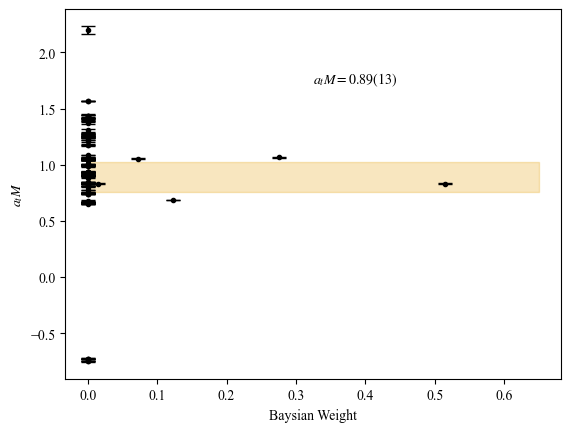

In [20]:
plt.errorbar(weights_normed, gv.mean(points), yerr=gv.sdev(points),
             fmt='.', capsize=5, color=colors[0])
plt.fill_between([0, 0.65], [a0 + sig] * 2, [a0 - sig] * 2, color=[colors[1][i] for i in range(3)] + [0.25])
plt.xlabel('Baysian Weight')
plt.ylabel('$a_t M$')
plt.annotate('$a_t M = 0.89(13)$', (0.5, 0.8), xycoords='axes fraction')
plt.savefig('systfitcomp.pdf')

$a_t M = 0.9096(28)$

## $m = 2$, $N_s = 2$

Text(0, 0.5, '$F(\\omega)^2$')

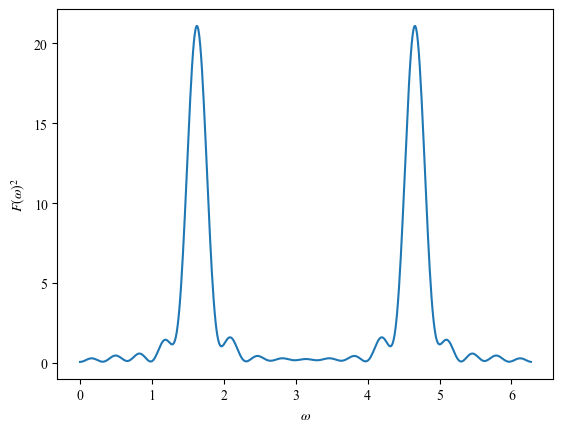

In [21]:
key = (2, 2)
steps = 500
plt.plot(np.linspace(0, steps - 1, steps) * 2 * np.pi / steps, gv.mean(dft(data_points[key][0], steps)))
plt.xlabel(r'$\omega$')
plt.ylabel(r'$F(\omega)^2$')

this looks like one peak strongly around $\omega = 1$ and then another peak around $\omega = 1.25$

Least Square Fit (no prior):
  chi2/dof [dof] = 12 [4]    Q = 1.4e-09    

Parameters:
              0    0.9477 (32)      [    0.8 +- inf ]  
              1   1.61813 (68)      [    1.9 +- inf ]  
              2     0.956 (13)      [    0.4 +- inf ]  
              3    0.0468 (16)      [ 0.0349 +- inf ]  
              4    -0.086 (16)      [ 0.1016 +- inf ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 13/0.0)
  fitter = scipy_least_squares    method = trf



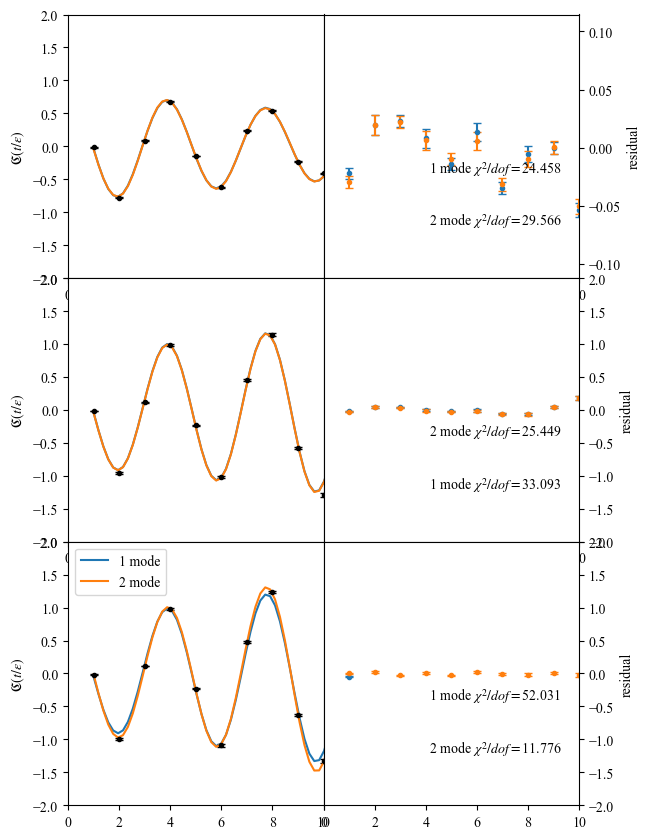

In [22]:


inflate_sig1 = {(2, 4): 1, (1, 4): 1, (1, 2): 1, (2, 2): 1}
inflate_sig2 = {(2, 4): 1, (1, 4): 1, (1, 2): 1, (2, 2):1}
inflate_sig3 = {(2, 4): 1, (1, 4): 1, (1, 2): 1, (2, 2): 1}

data1 = gv.gvar(gv.mean(data_points[key][0]), gv.evalcov(data_points[key][0]) * inflate_sig1[key])
data2 = gv.gvar(gv.mean(data_points[key][0] / data_points[key][1]),
                gv.evalcov(data_points[key][0] / data_points[key][1]) * inflate_sig2[key])
data3 = gv.gvar(gv.mean(data_points[key][0] / fcn(np.linspace(1, trims[key], trims[key]),
                                  all_fits[key].p)),
                gv.evalcov(data_points[key][0] / fcn(np.linspace(1, trims[key], trims[key]),
                                  all_fits[key].p)) * inflate_sig3[key])
# data3 = np.array([1, 1, 1, 1, 1, 1, -1, 1, 1, 1]) * data3
fit11, _ = get_fit_corr(key, data1[:9], p0=[1, 1.84, 0, 0])
fit12, _ = get_fit_corr2(key, data1[:9], p0=[1, 1.84,  1.25, 0, 0])
fit21, _ = get_fit_corr(key, data2[:9], p0=[1, 1.84, 0, 0])
fit22, _ = get_fit_corr2(key, data2[:9], p0=[1, 1.84,  1.25, 0, 0])
fit31, _ = get_fit_corr(key, data3[:9], p0=[1, 1.84, 0, 0])
fit32, _ = get_fit_corr2(key, data3[:9], p0=[0.8, 1.9, 0.4, 0.0349, 0.1016])
print(fit32)
fig, ax = plt.subplots(ncols=2, nrows=3)
xpoints = np.linspace(1, len(data1), 100)
xpts = np.linspace(1, len(data1), len(data1))

ax[0, 0].errorbar(np.linspace(1, len(data1), len(data1)),
             gv.mean(data1), yerr=gv.sdev(data1), capsize=3, color=colors[0], fmt='.')

ax[0, 0].plot(xpoints, fcn(xpoints, gv.mean(fit11.p)))
ax[0, 1].errorbar(xpts, gv.mean(fcn(xpts, fit11.p) - data1), yerr=gv.sdev(data1),
                  capsize=3, fmt='.')

ax[0, 0].plot(xpoints, fcn2p(xpoints, gv.mean(fit12.p)))
ax[0, 1].errorbar(xpts, gv.mean(fcn2p(xpts, fit12.p) - data1), yerr=gv.sdev(data1),
                  capsize=3, fmt='.')


ax[1, 0].errorbar(np.linspace(1, len(data1), len(data1)),
             gv.mean(data2), yerr=gv.sdev(data2), capsize=3, color=colors[0], fmt='.')

ax[1, 0].plot(xpoints, fcn(xpoints, gv.mean(fit21.p)))
ax[1, 1].errorbar(xpts, gv.mean(fcn(xpts, fit21.p) - data2), yerr=gv.sdev(data2),
                  capsize=3, fmt='.')

ax[1, 0].plot(xpoints, fcn2p(xpoints, gv.mean(fit22.p)))
ax[1, 1].errorbar(xpts, gv.mean(fcn2p(xpts, fit22.p) - data2), yerr=gv.sdev(data2),
                  capsize=3, fmt='.')


ax[2, 0].errorbar(np.linspace(1, len(data1), len(data1)),
             gv.mean(data3), yerr=gv.sdev(data3), capsize=3, color=colors[0], fmt='.')

ax[2, 0].plot(xpoints, fcn(xpoints, gv.mean(fit31.p)), label='1 mode')
ax[2, 1].errorbar(xpts, gv.mean(fcn(xpts, fit32.p) - data3), yerr=gv.sdev(data3),
                  capsize=3, fmt='.')

ax[2, 0].plot(xpoints, fcn2p(xpoints, gv.mean(fit32.p)), label='2 mode')
ax[2, 1].errorbar(xpts, gv.mean(fcn2p(xpts, fit32.p) - data3), yerr=gv.sdev(data3),
                  capsize=3, fmt='.')
ax[2, 0].legend()
for i in range(3):
    ax[i, 1].yaxis.tick_right()
    ax[i, 1].yaxis.set_label_position("right")
    ax[i, 1].set_ylabel('residual')
    ax[i, 0].set_ylabel(r'$\mathfrak{C}(t / \epsilon)$')
    ax[i, 0].set_ylim(-2, 2)
    ax[i, 0].set_xlim(0, 10)
    ax[i, 1].set_xlim(0, 10)
ax[0, 1].annotate(r' 1 mode $\chi^2 / dof = $' + str(np.round(fit11.chi2 / fit11.dof, decimals=3)),
                 (0.4, 0.4), xycoords='axes fraction')
ax[1, 1].annotate(r' 2 mode $\chi^2 / dof = $' + str(np.round(fit21.chi2 / fit21.dof, decimals=3)),
                 (0.4, 0.4), xycoords='axes fraction')
ax[2, 1].annotate(r' 1 mode $\chi^2 / dof = $' + str(np.round(fit31.chi2 / fit31.dof, decimals=3)),
                 (0.4, 0.4), xycoords='axes fraction')
ax[0, 1].annotate(r' 2 mode $\chi^2 / dof = $' + str(np.round(fit12.chi2 / fit12.dof, decimals=3)),
                 (0.4, 0.2), xycoords='axes fraction')
ax[1, 1].annotate(r' 1 mode $\chi^2 / dof = $' + str(np.round(fit22.chi2 / fit22.dof, decimals=3)),
                 (0.4, 0.2), xycoords='axes fraction')
ax[2, 1].annotate(r' 2 mode $\chi^2 / dof = $' + str(np.round(fit32.chi2 / fit32.dof, decimals=3)),
                 (0.4, 0.2), xycoords='axes fraction')
ax[1, 1].set_ylim(-2, 2)
ax[2, 1].set_ylim(-2, 2)
# ax[0, 0].plot(xpoints, fcn(xpoints, gv.mean(fit2.p)))
# ax[0, 0].plot(xpoints, fcn(xpoints, gv.mean(fit3.p)))

fig.set_size_inches((6.5, 8.5))
fig.tight_layout()
fig.subplots_adjust(hspace=0, wspace=0)

fig.savefig(f'test_fit_proceedurecomp_m{key[0]}ns{key[1]}.pdf')

In [24]:

data3 = gv.gvar(gv.mean(data_points[key][0] / fcn(np.linspace(1, trims[key], trims[key]),
                                  all_fits[key].p)),
                gv.evalcov(data_points[key][0] / fcn(np.linspace(1, trims[key], trims[key]),
                                  all_fits[key].p)))
fit32, _ = get_fit_corr2(key, data3, p0=[0.8, 1.9, 0.4, 0.0349, 0.1016])
print(fit32)

Least Square Fit (no prior):
  chi2/dof [dof] = 1.2e+02 [15]    Q = 0    

Parameters:
              0                           0.9897 (52)                 [    0.8 +- inf ]  
              1                           1.6191 (10)                 [    1.9 +- inf ]  
              2                            0.223 (82)                 [    0.4 +- inf ]  
              3   -50.88489864864719436354789650 (89)                 [ 0.0349 +- inf ]  
              4                            0.655 (14)                 [ 0.1016 +- inf ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08*,1e-10,1e-10)    (itns/time = 21/0.0)
  fitter = scipy_least_squares    method = trf



In [41]:
points = []
weights = []
chi2s = []
def prMD(chi2, nfitpars, ncut):
    return np.exp(-0.5 * (chi2 + 2 * nfitpars + 2 * ncut))

dataf = data3[:]
for tmin in range(len(data2) - 8):
    for tmax in range(tmin + 8, len(dataf)):
        fit, _ = get_fit_corr2(key, dataf[tmin : tmax], p0=[0.8, 1.9, 0.4, 0.0349, 0.1016])
        weight = prMD(fit.chi2, 4, len(dataf) - len(dataf[tmin:tmax]))
        chi2s.append(fit.chi2 / fit.dof)
        points.append(fit.p[1])
        weights.append(weight)
points = np.array(points)
weights = np.array(weights)
chi2s = np.array(chi2s)

In [42]:
weights_normed = weights / sum(weights)

a0 = sum(weights_normed * gv.mean(points))
a02 = sum(weights_normed * gv.mean(points * points))
sig = np.sqrt(a02 - a0**2)
print(a0, sig)

1.6609129572547836 0.05375555273911572


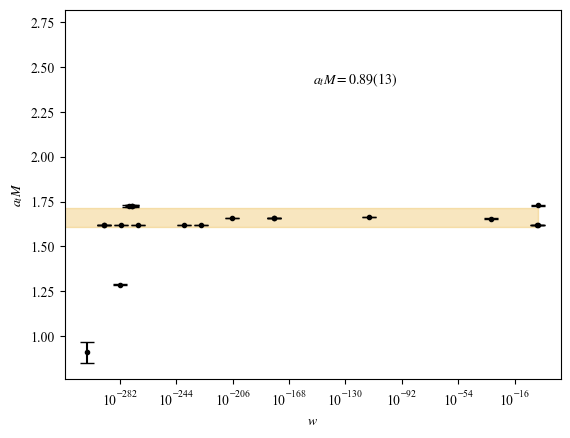

In [43]:
plt.errorbar(weights_normed, gv.mean(points), yerr=gv.sdev(points),
             fmt='.', capsize=5, color=colors[0])
plt.fill_between([0, 0.65], [a0 + sig] * 2, [a0 - sig] * 2, color=[colors[1][i] for i in range(3)] + [0.25])
plt.xlabel('$w$')
plt.ylabel('$a_t M$')
plt.xscale('log')
plt.annotate('$a_t M = 0.89(13)$', (0.5, 0.8), xycoords='axes fraction')
plt.savefig('systfitcomp.pdf')

$a_t M = 1.619(12)$

## $m = 1$, $N_s = 4$

Text(0, 0.5, '$F(\\omega)^2$')

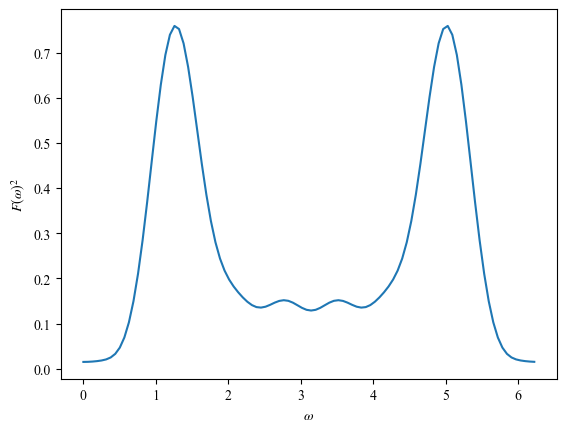

In [251]:
key = (1, 4)
data2 = gv.gvar(gv.mean(data_points[key][0] / data_points[key][1]),
                gv.evalcov(data_points[key][0] / data_points[key][1]) * inflate_sig2[key])
data3 = gv.gvar(gv.mean(data_points[key][0] / fcn(np.linspace(1, trims[key], trims[key]),
                                  all_fits[key].p)),
                gv.evalcov(data_points[key][0] / fcn(np.linspace(1, trims[key], trims[key]),
                                  all_fits[key].p)) * inflate_sig3[key])
data1 = gv.gvar(gv.mean(data_points[key][0]), gv.evalcov(data_points[key][0]) * inflate_sig1[key])
steps = 100
plt.plot(np.linspace(0, steps - 1, steps) * 2 * np.pi / steps, gv.mean(dft(data1, steps)))
plt.xlabel(r'$\omega$')
plt.ylabel(r'$F(\omega)^2$')

this looks like one peak strongly around $\omega = 1$ and then another peak around $\omega = 1.25$

Least Square Fit (no prior):
  chi2/dof [dof] = 71 [5]    Q = 8.9e-75    

Parameters:
              0                   1.000 (18)             [    0.8 +- inf ]  
              1                  1.1411 (49)             [    1.8 +- inf ]  
              2   -3.881162351991330528 (35)             [      0 +- inf ]  
              3                   -1.32 (18)             [ 0.0349 +- inf ]  
              4                   0.747 (24)             [ 0.1016 +- inf ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 29/0.0)
  fitter = scipy_least_squares    method = trf



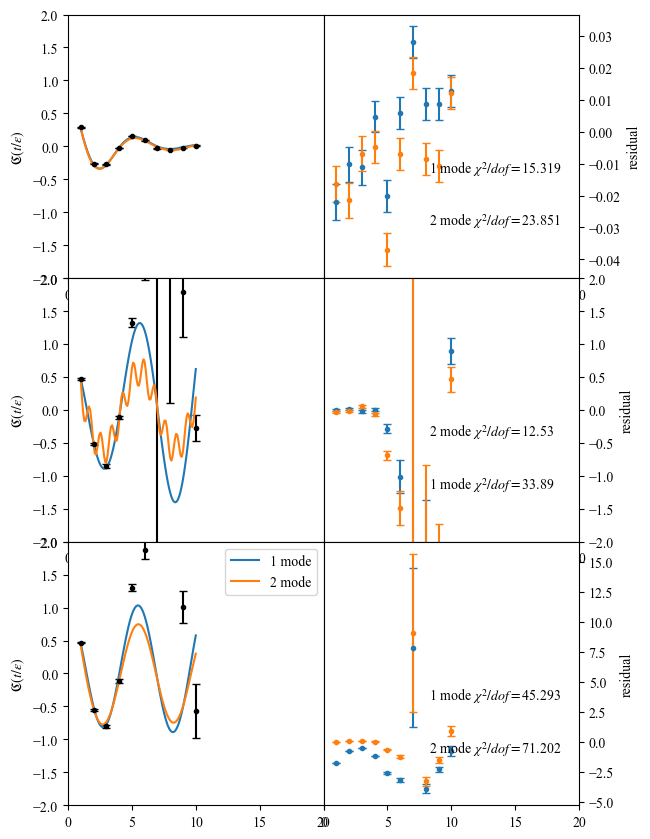

In [257]:


inflate_sig1 = {(2, 4): 1, (1, 4): 1, (1, 2): 1, (2, 2): 1}
inflate_sig2 = {(2, 4): 1, (1, 4): 1, (1, 2): 1, (2, 2):1}
inflate_sig3 = {(2, 4): 1, (1, 4): 1, (1, 2): 1, (2, 2): 1}

data1 = gv.gvar(gv.mean(data_points[key][0]), gv.evalcov(data_points[key][0]) * inflate_sig1[key])
data2 = gv.gvar(gv.mean(data_points[key][0] / data_points[key][1]),
                gv.evalcov(data_points[key][0] / data_points[key][1]) * inflate_sig2[key])
data3 = gv.gvar(gv.mean(data_points[key][0] / fcn(np.linspace(1, trims[key], trims[key]),
                                  all_fits[key].p)),
                gv.evalcov(data_points[key][0] / fcn(np.linspace(1, trims[key], trims[key]),
                                  all_fits[key].p)) * inflate_sig3[key])
# data3 = np.array([1, 1, 1, 1, 1, 1, -1, 1, 1, 1]) * data3
fit11, _ = get_fit_corr(key, data1, p0=[1, 0.84, 0, 0])
fit12, _ = get_fit_corr2(key, data1, p0=[1, 0.84,  1.25, 0, 0])
fit21, _ = get_fit_corr(key, data2, p0=[1, 1.8, 0, 0])
fit22, _ = get_fit_corr2(key, data2, p0=[1, 3,  0.8, 0, 0])
fit31, _ = get_fit_corr(key, data3, p0=[1, 0.84, 0, 0])
fit32, _ = get_fit_corr2(key, data3, p0=[0.8, 1.8, 0, 0.0349, 0.1016])
print(fit32)
fig, ax = plt.subplots(ncols=2, nrows=3)
xpoints = np.linspace(1, len(data1), 100)
xpts = np.linspace(1, len(data1), len(data1))

ax[0, 0].errorbar(np.linspace(1, len(data1), len(data1)),
             gv.mean(data1), yerr=gv.sdev(data1), capsize=3, color=colors[0], fmt='.')

ax[0, 0].plot(xpoints, fcn(xpoints, gv.mean(fit11.p)))
ax[0, 1].errorbar(xpts, gv.mean(fcn(xpts, fit11.p) - data1), yerr=gv.sdev(data1),
                  capsize=3, fmt='.')

ax[0, 0].plot(xpoints, fcn2p(xpoints, gv.mean(fit12.p)))
ax[0, 1].errorbar(xpts, gv.mean(fcn2p(xpts, fit12.p) - data1), yerr=gv.sdev(data1),
                  capsize=3, fmt='.')


ax[1, 0].errorbar(np.linspace(1, len(data1), len(data1)),
             gv.mean(data2), yerr=gv.sdev(data2), capsize=3, color=colors[0], fmt='.')

ax[1, 0].plot(xpoints, fcn(xpoints, gv.mean(fit21.p)))
ax[1, 1].errorbar(xpts, gv.mean(fcn(xpts, fit21.p) - data2), yerr=gv.sdev(data2),
                  capsize=3, fmt='.')

ax[1, 0].plot(xpoints, fcn2p(xpoints, gv.mean(fit22.p)))
ax[1, 1].errorbar(xpts, gv.mean(fcn2p(xpts, fit22.p) - data2), yerr=gv.sdev(data2),
                  capsize=3, fmt='.')


ax[2, 0].errorbar(np.linspace(1, len(data1), len(data1)),
             gv.mean(data3), yerr=gv.sdev(data3), capsize=3, color=colors[0], fmt='.')

ax[2, 0].plot(xpoints, fcn(xpoints, gv.mean(fit31.p)), label='1 mode')
ax[2, 1].errorbar(xpts, gv.mean(fcn(xpts, fit32.p) - data3), yerr=gv.sdev(data3),
                  capsize=3, fmt='.')

ax[2, 0].plot(xpoints, fcn2p(xpoints, gv.mean(fit32.p)), label='2 mode')
ax[2, 1].errorbar(xpts, gv.mean(fcn2p(xpts, fit32.p) - data3), yerr=gv.sdev(data3),
                  capsize=3, fmt='.')
ax[2, 0].legend()
for i in range(3):
    ax[i, 1].yaxis.tick_right()
    ax[i, 1].yaxis.set_label_position("right")
    ax[i, 1].set_ylabel('residual')
    ax[i, 0].set_ylabel(r'$\mathfrak{C}(t / \epsilon)$')
    ax[i, 0].set_ylim(-2, 2)
    ax[i, 0].set_xlim(0, 20)
    ax[i, 1].set_xlim(0, 20)
ax[0, 1].annotate(r' 1 mode $\chi^2 / dof = $' + str(np.round(fit11.chi2 / fit11.dof, decimals=3)),
                 (0.4, 0.4), xycoords='axes fraction')
ax[1, 1].annotate(r' 2 mode $\chi^2 / dof = $' + str(np.round(fit21.chi2 / fit21.dof, decimals=3)),
                 (0.4, 0.4), xycoords='axes fraction')
ax[2, 1].annotate(r' 1 mode $\chi^2 / dof = $' + str(np.round(fit31.chi2 / fit31.dof, decimals=3)),
                 (0.4, 0.4), xycoords='axes fraction')
ax[0, 1].annotate(r' 2 mode $\chi^2 / dof = $' + str(np.round(fit12.chi2 / fit12.dof, decimals=3)),
                 (0.4, 0.2), xycoords='axes fraction')
ax[1, 1].annotate(r' 1 mode $\chi^2 / dof = $' + str(np.round(fit22.chi2 / fit22.dof, decimals=3)),
                 (0.4, 0.2), xycoords='axes fraction')
ax[2, 1].annotate(r' 2 mode $\chi^2 / dof = $' + str(np.round(fit32.chi2 / fit32.dof, decimals=3)),
                 (0.4, 0.2), xycoords='axes fraction')
ax[1, 1].set_ylim(-2, 2)
# ax[2, 1].set_ylim(-2, 2)
# ax[0, 0].plot(xpoints, fcn(xpoints, gv.mean(fit2.p)))
# ax[0, 0].plot(xpoints, fcn(xpoints, gv.mean(fit3.p)))

fig.set_size_inches((6.5, 8.5))
fig.tight_layout()
fig.subplots_adjust(hspace=0, wspace=0)

fig.savefig(f'test_fit_proceedurecomp_m{key[0]}ns{key[1]}.pdf')

In [258]:

data1 = gv.gvar(gv.mean(data_points[key][0]), gv.evalcov(data_points[key][0]) * inflate_sig1[key])
data2 = gv.gvar(gv.mean(data_points[key][0] / data_points[key][1]),
                gv.evalcov(data_points[key][0] / data_points[key][1]))
# data3 = np.array([1, 1, 1, 1, 1, 1, -1, 1, 1, 1]) * data3
fit11, _ = get_fit_corr(key, data1, p0=[1, 0.84, 0, 0])
fit12, _ = get_fit_corr2(key, data1, p0=[1, 0.84,  1.25, 0, 0])
fit21, _ = get_fit_corr(key, data2, p0=[1, 1.8, 0, 0])

data2 = gv.gvar(gv.mean(data_points[key][0] / data_points[key][1]),
                gv.evalcov(data_points[key][0] / data_points[key][1]) * 33.89 * 1.3)

fit22, _ = get_fit_corr2(key, data2, p0=[1, 0.84,  1.25, 0, 0])
print(fit21, fit22)

Least Square Fit (no prior):
  chi2/dof [dof] = 13 [6]    Q = 3.5e-14    

Parameters:
              0    0.803 (28)     [   1 +- inf ]  
              1   1.1308 (38)     [ 1.8 +- inf ]  
              2    0.075 (14)     [   0 +- inf ]  
              3   0.0988 (76)     [   0 +- inf ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 18/0.0)
  fitter = scipy_least_squares    method = trf
 Least Square Fit (no prior):
  chi2/dof [dof] = 1 [5]    Q = 0.42    

Parameters:
              0      0.99 (25)      [    1 +- inf ]  
              1     1.110 (32)      [ 0.84 +- inf ]  
              2   3 +- 1.3e+05      [ 1.25 +- inf ]  
              3     -0.08 (41)      [    0 +- inf ]  
              4    0.04 (1.14)      [    0 +- inf ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 35/0.0)
  fitter = scipy_least_squares    method = trf



In [263]:
points = []
weights = []
chi2s = []
def prMD(chi2, nfitpars, ncut):
    return np.exp(-0.5 * (chi2 + 2 * nfitpars + 2 * ncut))

dataf = data2
for tmin in range(len(data2) - 6):
    for tmax in range(tmin + 6, len(dataf)):
        fit, _ = get_fit_corr(key, dataf[tmin : tmax], p0=[1, 0.96, 0, 0])
        weight = prMD(fit.chi2, 4, len(dataf) - len(dataf[tmin:tmax]))
        chi2s.append(fit.chi2 / fit.dof)
        points.append(fit.p[1])
        weights.append(weight)
points = np.array(points)
weights = np.array(weights)
chi2s = np.array(chi2s)

In [264]:
weights_normed = weights / sum(weights)

a0 = sum(weights_normed * gv.mean(points))
a02 = sum(weights_normed * gv.mean(points * points))
sig = np.sqrt(a02 - a0**2)
print(a0, sig)

1.0669558240948132 0.18499630835126585


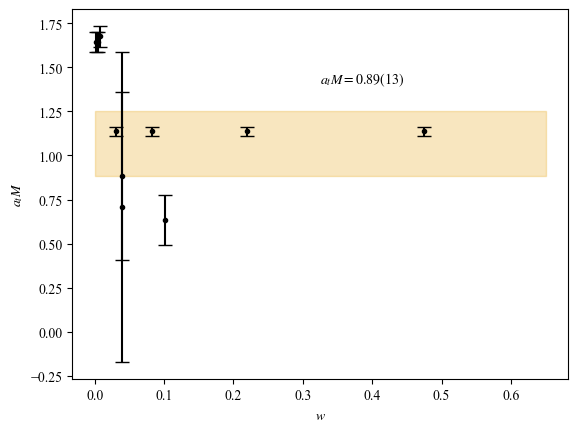

In [265]:
plt.errorbar(weights_normed, gv.mean(points), yerr=gv.sdev(points),
             fmt='.', capsize=5, color=colors[0])
plt.fill_between([0, 0.65], [a0 + sig] * 2, [a0 - sig] * 2, color=[colors[1][i] for i in range(3)] + [0.25])
plt.xlabel('$w$')
plt.ylabel('$a_t M$')
# plt.xscale('log')
plt.annotate('$a_t M = 0.89(13)$', (0.5, 0.8), xycoords='axes fraction')
plt.savefig('systfitcomp.pdf')

## $m = 2$, $N_s = 4$

Text(0, 0.5, '$F(\\omega)^2$')

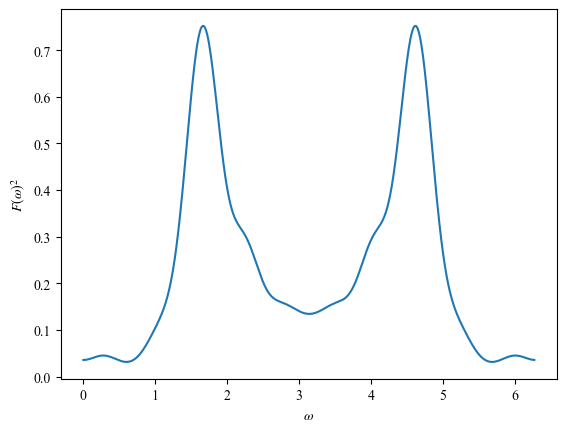

In [58]:
key = (2, 4)
steps = 500
plt.plot(np.linspace(0, steps - 1, steps) * 2 * np.pi / steps, gv.mean(dft(data_points[key][0], steps)))
plt.xlabel(r'$\omega$')
plt.ylabel(r'$F(\omega)^2$')

this looks like one peak strongly around $\omega = 1$ and then another peak around $\omega = 1.25$

Least Square Fit (no prior):
  chi2/dof [dof] = 1.5 [10]    Q = 0.14    

Parameters:
              0   0.7617 (41)     [    0.8 +- inf ]  
              1   1.5960 (31)     [    1.9 +- inf ]  
              2    0.193 (11)     [    0.4 +- inf ]  
              3   0.0313 (67)     [ 0.0349 +- inf ]  
              4   -0.001 (28)     [ 0.1016 +- inf ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 10/0.0)
  fitter = scipy_least_squares    method = trf



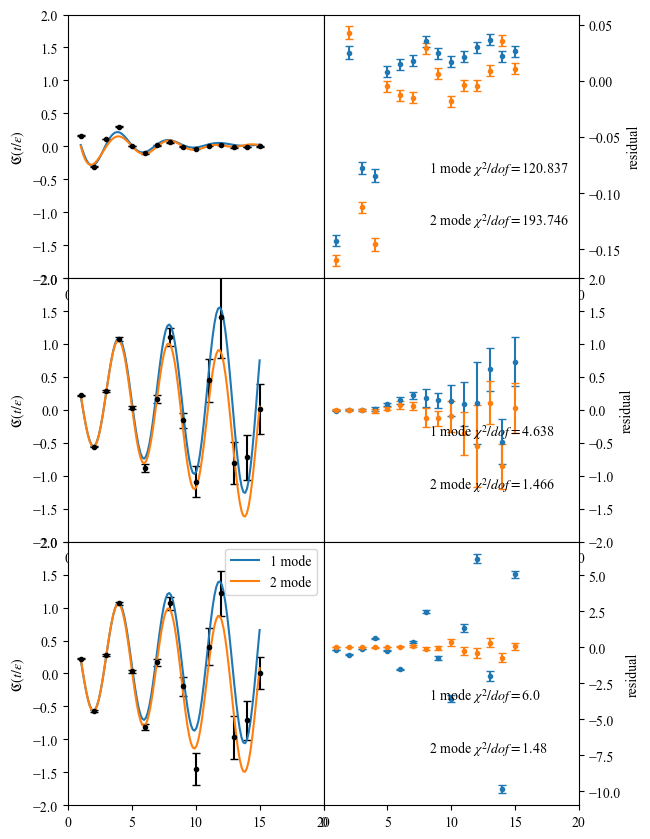

In [59]:


inflate_sig1 = {(2, 4): 1, (1, 4): 1, (1, 2): 1, (2, 2): 1}
inflate_sig2 = {(2, 4): 1, (1, 4): 1, (1, 2): 1, (2, 2):1}
inflate_sig3 = {(2, 4): 1, (1, 4): 1, (1, 2): 1, (2, 2): 1}

data1 = gv.gvar(gv.mean(data_points[key][0]), gv.evalcov(data_points[key][0]) * inflate_sig1[key])
data2 = gv.gvar(gv.mean(data_points[key][0] / data_points[key][1]),
                gv.evalcov(data_points[key][0] / data_points[key][1]) * inflate_sig2[key])
data3 = gv.gvar(gv.mean(data_points[key][0] / fcn(np.linspace(1, trims[key], trims[key]),
                                  all_fits[key].p)),
                gv.evalcov(data_points[key][0] / fcn(np.linspace(1, trims[key], trims[key]),
                                  all_fits[key].p)) * inflate_sig3[key])
# data3 = np.array([1, 1, 1, 1, 1, 1, -1, 1, 1, 1]) * data3
fit11, _ = get_fit_corr(key, data1, p0=[1, 1.84, 0, 0])
fit12, _ = get_fit_corr2(key, data1, p0=[1, 1.84,  0.2, 0, 0])
fit21, _ = get_fit_corr(key, data2, p0=[1, 1.84, 0, 0])
fit22, _ = get_fit_corr2(key, data2, p0=[1, 1.84,  1.25, 0, 0])
fit31, _ = get_fit_corr(key, data3, p0=[1, 1.84, 0, 0])
fit32, _ = get_fit_corr2(key, data3, p0=[0.8, 1.9, 0.4, 0.0349, 0.1016])
print(fit32)
fig, ax = plt.subplots(ncols=2, nrows=3)
xpoints = np.linspace(1, len(data1), 100)
xpts = np.linspace(1, len(data1), len(data1))

ax[0, 0].errorbar(np.linspace(1, len(data1), len(data1)),
             gv.mean(data1), yerr=gv.sdev(data1), capsize=3, color=colors[0], fmt='.')

ax[0, 0].plot(xpoints, fcn(xpoints, gv.mean(fit11.p)))
ax[0, 1].errorbar(xpts, gv.mean(fcn(xpts, fit11.p) - data1), yerr=gv.sdev(data1),
                  capsize=3, fmt='.')

ax[0, 0].plot(xpoints, fcn2p(xpoints, gv.mean(fit12.p)))
ax[0, 1].errorbar(xpts, gv.mean(fcn2p(xpts, fit12.p) - data1), yerr=gv.sdev(data1),
                  capsize=3, fmt='.')


ax[1, 0].errorbar(np.linspace(1, len(data1), len(data1)),
             gv.mean(data2), yerr=gv.sdev(data2), capsize=3, color=colors[0], fmt='.')

ax[1, 0].plot(xpoints, fcn(xpoints, gv.mean(fit21.p)))
ax[1, 1].errorbar(xpts, gv.mean(fcn(xpts, fit21.p) - data2), yerr=gv.sdev(data2),
                  capsize=3, fmt='.')

ax[1, 0].plot(xpoints, fcn2p(xpoints, gv.mean(fit22.p)))
ax[1, 1].errorbar(xpts, gv.mean(fcn2p(xpts, fit22.p) - data2), yerr=gv.sdev(data2),
                  capsize=3, fmt='.')


ax[2, 0].errorbar(np.linspace(1, len(data1), len(data1)),
             gv.mean(data3), yerr=gv.sdev(data3), capsize=3, color=colors[0], fmt='.')

ax[2, 0].plot(xpoints, fcn(xpoints, gv.mean(fit31.p)), label='1 mode')
ax[2, 1].errorbar(xpts, gv.mean(fcn(xpts, fit32.p) - data3), yerr=gv.sdev(data3),
                  capsize=3, fmt='.')

ax[2, 0].plot(xpoints, fcn2p(xpoints, gv.mean(fit32.p)), label='2 mode')
ax[2, 1].errorbar(xpts, gv.mean(fcn2p(xpts, fit32.p) - data3), yerr=gv.sdev(data3),
                  capsize=3, fmt='.')
ax[2, 0].legend()
for i in range(3):
    ax[i, 1].yaxis.tick_right()
    ax[i, 1].yaxis.set_label_position("right")
    ax[i, 1].set_ylabel('residual')
    ax[i, 0].set_ylabel(r'$\mathfrak{C}(t / \epsilon)$')
    ax[i, 0].set_ylim(-2, 2)
    ax[i, 0].set_xlim(0, 20)
    ax[i, 1].set_xlim(0, 20)
ax[0, 1].annotate(r' 1 mode $\chi^2 / dof = $' + str(np.round(fit11.chi2 / fit11.dof, decimals=3)),
                 (0.4, 0.4), xycoords='axes fraction')
ax[1, 1].annotate(r' 1 mode $\chi^2 / dof = $' + str(np.round(fit21.chi2 / fit21.dof, decimals=3)),
                 (0.4, 0.4), xycoords='axes fraction')
ax[2, 1].annotate(r' 1 mode $\chi^2 / dof = $' + str(np.round(fit31.chi2 / fit31.dof, decimals=3)),
                 (0.4, 0.4), xycoords='axes fraction')
ax[0, 1].annotate(r' 2 mode $\chi^2 / dof = $' + str(np.round(fit12.chi2 / fit12.dof, decimals=3)),
                 (0.4, 0.2), xycoords='axes fraction')
ax[1, 1].annotate(r' 2 mode $\chi^2 / dof = $' + str(np.round(fit22.chi2 / fit22.dof, decimals=3)),
                 (0.4, 0.2), xycoords='axes fraction')
ax[2, 1].annotate(r' 2 mode $\chi^2 / dof = $' + str(np.round(fit32.chi2 / fit32.dof, decimals=3)),
                 (0.4, 0.2), xycoords='axes fraction')
ax[1, 1].set_ylim(-2, 2)
# ax[2, 1].set_ylim(-2, 2)
# ax[0, 0].plot(xpoints, fcn(xpoints, gv.mean(fit2.p)))
# ax[0, 0].plot(xpoints, fcn(xpoints, gv.mean(fit3.p)))

fig.set_size_inches((6.5, 8.5))
fig.tight_layout()
fig.subplots_adjust(hspace=0, wspace=0)

fig.savefig(f'test_fit_proceedurecomp_m{key[0]}ns{key[1]}.pdf')

In [60]:

data1 = gv.gvar(gv.mean(data_points[key][0]), gv.evalcov(data_points[key][0]) * inflate_sig1[key])
data2 = gv.gvar(gv.mean(data_points[key][0] / data_points[key][1]),
                gv.evalcov(data_points[key][0] / data_points[key][1]))
# data3 = np.array([1, 1, 1, 1, 1, 1, -1, 1, 1, 1]) * data3
fit11, _ = get_fit_corr(key, data1, p0=[1, 1.84, 0, 0])
fit12, _ = get_fit_corr2(key, data1, p0=[1, 1.84,  0.2, 0, 0])
fit21, _ = get_fit_corr(key, data2, p0=[1, 1.84, 0, 0])
fit22, _ = get_fit_corr2(key, data2, p0=[1, 1.84,  1.25, 0, 0])

In [61]:
print(fit22), print(fit21)

Least Square Fit (no prior):
  chi2/dof [dof] = 1.5 [10]    Q = 0.14    

Parameters:
              0   0.7576 (44)     [    1 +- inf ]  
              1   1.5947 (31)     [ 1.84 +- inf ]  
              2    0.196 (12)     [ 1.25 +- inf ]  
              3   0.0378 (72)     [    0 +- inf ]  
              4   -0.026 (28)     [    0 +- inf ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 17/0.0)
  fitter = scipy_least_squares    method = trf

Least Square Fit (no prior):
  chi2/dof [dof] = 4.6 [11]    Q = 4.1e-07    

Parameters:
              0    0.695 (21)     [    1 +- inf ]  
              1   1.5935 (30)     [ 1.84 +- inf ]  
              2   0.0550 (85)     [    0 +- inf ]  
              3   0.2227 (64)     [    0 +- inf ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 9/0.0)
  fitter = scipy_least_squares    method = trf



(None, None)

In [69]:
points = []
weights = []
chi2s = []
def prMD(chi2, nfitpars, ncut):
    return np.exp(-0.5 * (chi2 + 2 * nfitpars + 2 * ncut))

dataf = data2
for tmin in range(len(data2) - 7):
    for tmax in range(tmin + 7, len(dataf)):
        fit, _ = get_fit_corr2(key, dataf[tmin : tmax],p0=[0.8, 1.9, 0, 0, 0])
        weight = prMD(fit.chi2, 4, len(dataf) - len(dataf[tmin:tmax]))
        chi2s.append(fit.chi2 / fit.dof)
        points.append(fit.p[1])
        weights.append(weight)
points = np.array(points)
weights = np.array(weights)
chi2s = np.array(chi2s)

In [70]:
weights_normed = weights / sum(weights)

a0 = sum(weights_normed * gv.mean(points))
a02 = sum(weights_normed * gv.mean(points * points))
sig = np.sqrt(a02 - a0**2)
print(a0, sig)

1.5995362349341378 0.02716794783138206


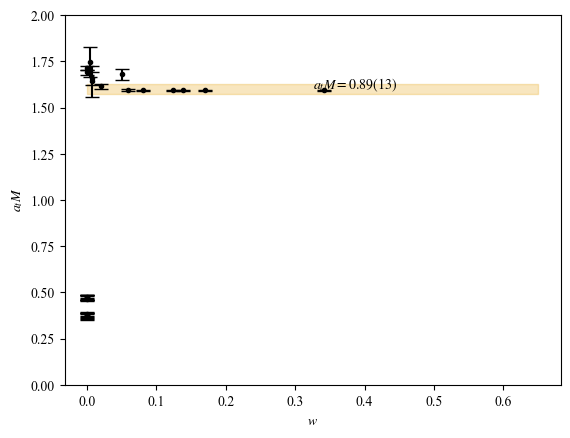

In [71]:
plt.errorbar(weights_normed, gv.mean(points), yerr=gv.sdev(points),
             fmt='.', capsize=5, color=colors[0])
plt.fill_between([0, 0.65], [a0 + sig] * 2, [a0 - sig] * 2, color=[colors[1][i] for i in range(3)] + [0.25])
plt.xlabel('$w$')
plt.ylabel('$a_t M$')
# plt.xscale('log')
plt.ylim(0, 2)
plt.annotate('$a_t M = 0.89(13)$', (0.5, 0.8), xycoords='axes fraction')
plt.savefig('systfitcomp.pdf')